## Small Multiples (Pairplot)

In [1]:
%run helper.py

In [2]:
df = sns.load_dataset("iris")
df.columns = [" ".join(x.split("_")) + " (cm)" for x in df.columns[:-1]] + ["species"]
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa


In [3]:
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["legend.handletextpad"] = 0.5
plt.rcParams["legend.borderaxespad"] = 0
plt.rcParams["legend.borderpad"] = 0

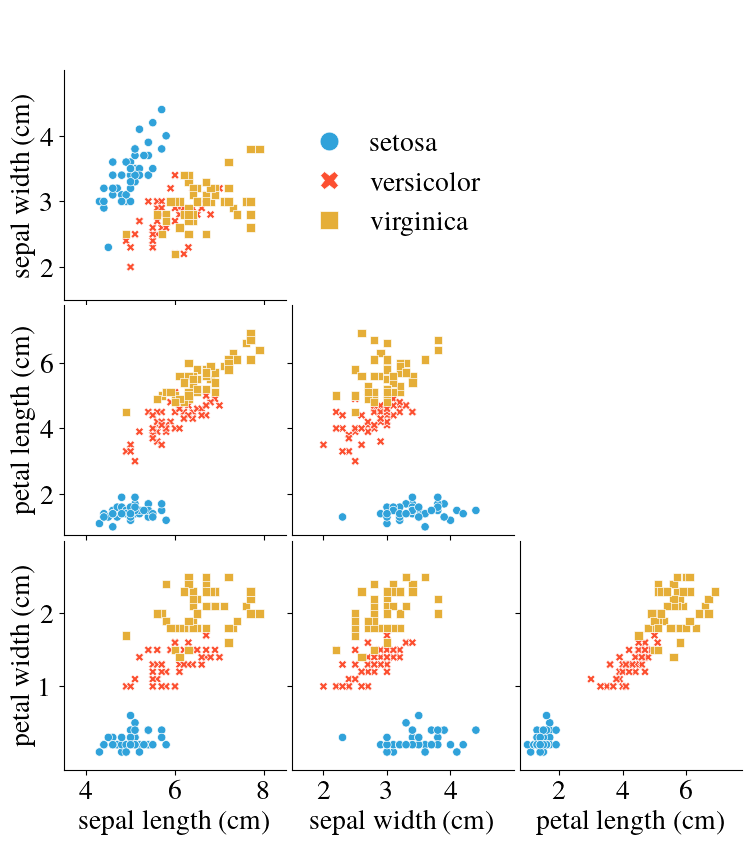

In [4]:
plot = "pairplot"
fig = sns.pairplot(df, hue="species", palette=cc.glasbey_hv[:3], markers=["o","X","s"],
          corner=True,aspect=0.78
    )
fig.square_grid = True
fig.legend.set_title("")

# Sepal width
fig.axes[1][0].set_yticks([2,3,4],[2,3,4])
fig.axes[1][1].set_xticks([2,3,4],[2,3,4])
fig.axes[1][0].set_ylim(1.5,5)
fig.axes[1][1].set_xlim(1.5,5)

# Petal length
fig.axes[2][0].set_yticks([2,4,6],[2,4,6])
fig.axes[2][2].set_xticks([2,4,6],[2,4,6])
fig.axes[2][0].set_ylim(0.75,7.75)
fig.axes[2][2].set_xlim(0.75,7.75)

# Petal width
fig.axes[3][0].set_yticks([1,2],[1,2])
fig.axes[3][3].set_xticks([1,2],[1,2])
fig.axes[3][0].set_ylim(-0.15,3)
fig.axes[3][3].set_xlim(-0.15,3)

# Sepal length
fig.axes[0][0].set_xticks([4,6,8],[4,6,8])
fig.axes[0][0].set_xlim(3.5,8.5)

# Post-processing to eliminate the diagonal
for idx,ax in enumerate(fig.diag_axes):
    ax.set_visible(False)
    fig.axes[idx, idx].remove()
plt.tight_layout(w_pad=0.05, h_pad=0.05, pad=0)
sns.move_legend(fig, loc=(0.4,0.72125,))

plt.savefig(f"../figures/{plot}-iris.pdf", bbox_inches="tight", transparent=True)